In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

## Manually view the dataset, and see if it requires any cleaning/normalization

In [251]:
#Data is normalized in data_normalization.ipynb file

## Load the dataset (csv file) into a Pandas DataFrame.

In [ ]:
df = pd.read_csv("normalized_data.csv")
df

,Unnamed: 0,Name,Gender,HSSC-1,HSSC-2,CGPA,FavoriteColor,BirthMonth,Weight
0,0,Muhammad Usman,Male,440,369,2.80,Black,March,77
1,1,Taha Ishfaq,Male,415,408,2.73,Red,March,72
2,2,Muhammad Hamdan,Male,388,321,2.78,Black,October,53
3,3,Syeda Maham Gillani,Female,412,440,3.11,Blue,February,63
4,4,Umar Wasim,Male,364,469,2.42,Black,October,80
...,...,...,...,...,...,...,...,...,...
123,123,M Abubakar Malik,Male,410,349,2.94,Blue,February,65
124,124,Muhammad Ali,Male,403,390,2.52,Yellow,October,81
125,125,shafaqat ali,Male,424,400,3.07,Black,May,58
126,126,Ammar Asif,Male,351,423,2.52,Black,December,68


## Print the list of all students whose first name starts with letter the 'H'.

In [253]:
names_with_H = df["Name"].str.startswith("H", na = False)
df[names_with_H]

,Unnamed: 0,Name,Gender,HSSC-1,HSSC-2,CGPA,FavoriteColor,BirthMonth,Weight
19,19,Habib Ullah,Male,399,434,3.35,Mustard,April,60
20,20,Hunain Javed,Male,362,413,2.94,Black,September,76
56,56,Hafiz Malahim Labib.,Male,390,430,3.24,Orange,May,54
57,57,HAMNA TARIQ SALEEMI,Female,400,418,2.80,Black,October,62
74,74,Hina,Female,410,350,2.90,Blue,August,67
75,75,Hamza Javed Khan,Male,400,381,3.39,Blue,January,78
77,77,Husnain Ahmed,Male,335,427,2.41,Dark blue,September,72
94,94,Hussain afzal,Male,415,346,2.87,Blue,March,81


## Print the total number of students who have a three words name (first-middle-surname).

In [254]:
import re
results = []
for name in df['Name']:
    name = re.findall(r'(\w+)(\s)(\w+)(\s)(\w+)', name)
    if name != []:
        jsonObj = {"name":name[0][0] + name[0][1] + name[0][2] + name[0][3] + name[0][4]}
        results.append(jsonObj)
    
df2 = pd.DataFrame(results)
df2

,name
0,Syeda Maham Gillani
1,Muhammad Subhan Khan
2,SARMAD WAHEED AHMED
3,M Hassaan Lateef
4,Ahmed Amjad Dar
5,Muhammad Ibrahim Khalil
6,Muhammad saim jamil
7,Ahmar Hafeez Khan
8,Muhammad Umar Asghar
9,MUHAMMAD HAIDER AWAN


## Print the percentage of students who have a CGPA of 3.0 or above.

In [255]:
count = 0
for cgpa in df['CGPA']:
    if float(cgpa) >= 3.0:
        count+=1
        
perc = count / len(df['CGPA']) *100

print("The percentage of students who have CGPA of 3.0 or above is " + str(float("{:.2f}".format(perc))) + "%")

The percentage of students who have CGPA of 3.0 or above is 26.56%


## Plot a pie chart to show the ratio of male and female students.

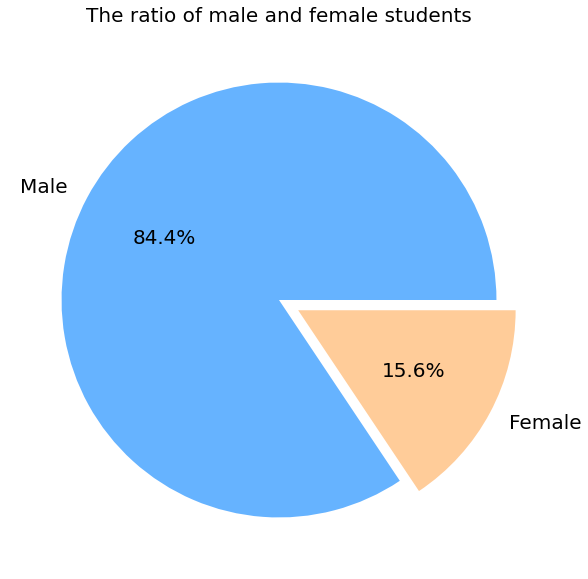

In [289]:
male_count = 0
female_count = 0

for gender in df['Gender']:
    if gender == "Male":
        male_count+=1
    else:
        female_count+=1
        
# print("Male = " + str(male_count))
# print("Female = " + str(female_count))

labels = ['Male', 'Female']
data = [male_count, female_count]
colors = ['#66b3ff','#ffcc99']
explode = (0, 0.1)
plt.figure(figsize=(10, 10))
plt.pie(data, labels = labels, textprops={'fontsize': 20}, explode=explode, autopct='%1.1f%%', colors=colors)
#plt.tight_layout()
plt.title('The ratio of male and female students', fontsize= 20)
plt.show()

## Plot the CGPA of all male students on a histogram with intervals 2.0-2.5, 2.6-3.0, 3.1-3.5, 3.6-4.0.

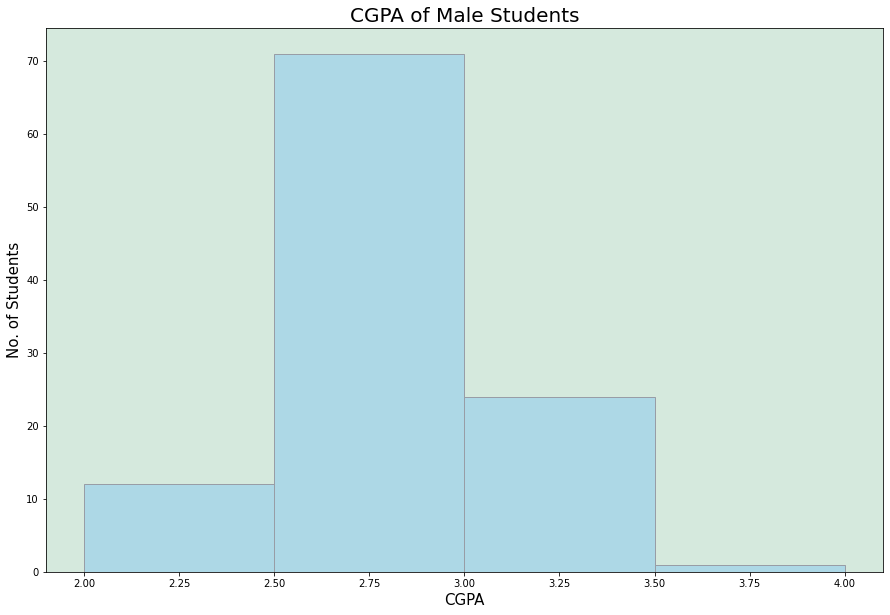

In [258]:
results = []

for gpa, gender in zip(df['CGPA'], df['Gender']):
    if gender == 'Male':
        results.append(gpa)

plt.figure(figsize=(15, 10))
ax = plt.axes()
ax.set_facecolor("#d5e9dd")
plt.hist(results, color = 'lightblue',edgecolor='#989da6', bins=[2, 2.5, 3.0, 3.5, 4])
# plt.grid()
plt.title('CGPA of Male Students', fontsize=20)
plt.xlabel('CGPA', fontsize=15)
plt.ylabel('No. of Students', fontsize=15)
plt.show()

## Plot the HSSC-1 marks of all male vs female students on a scatter plot.

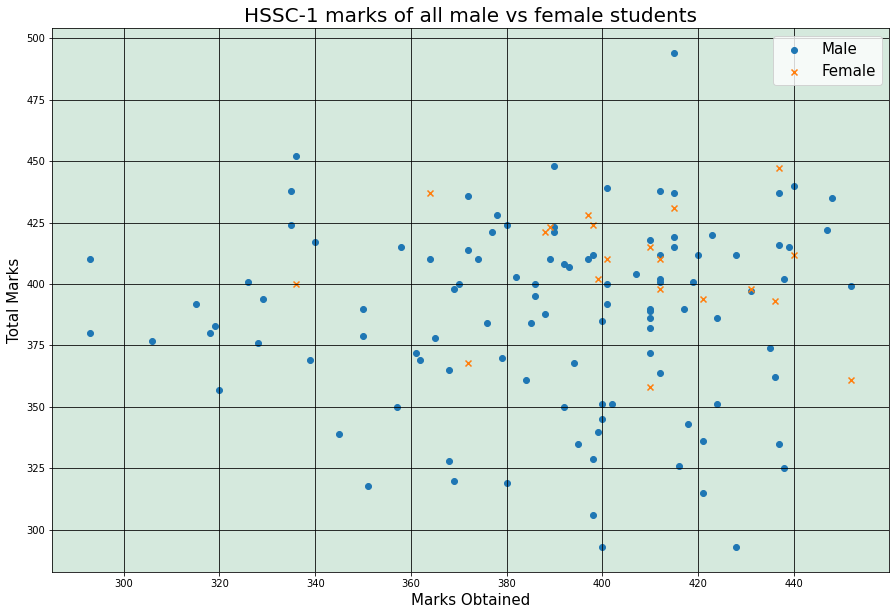

In [259]:
male_marks = []
female_marks = []

for gender, marks in zip(df['Gender'], df['HSSC-1']):
    if gender == 'Male':
        male_marks.append(marks)
    else:
         female_marks.append(marks)
            
i = 0
x = len(df['HSSC-1']) - len(male_marks)
while (i < x):
    male_marks.append('NaN')
    i+=1

i = 0
x = len(df['HSSC-1']) - len(female_marks)
while (i < x):
    female_marks.append('NaN')
    i+=1
    

grades_range = df['HSSC-1']

# print(male_marks)
# print(female_marks)

# print(len(male_marks))
# print(len(female_marks))
# print(len(grades_range))

plt.figure(figsize=(15, 10))
ax = plt.axes()
ax.set_facecolor("#d5e9dd")
plt.scatter(grades_range, male_marks, marker='o')
plt.scatter(grades_range,female_marks, marker='x')
plt.xlabel('Marks Obtained', fontsize=15)
plt.ylabel('Total Marks', fontsize=15)
plt.title("HSSC-1 marks of all male vs female students", fontsize=20)
plt.legend(["Male" , "Female"], fontsize=15)
plt.grid(True)
plt.grid(color='black')
plt.show()


## Plot the favorite colors of male vs female students on a bar chart.

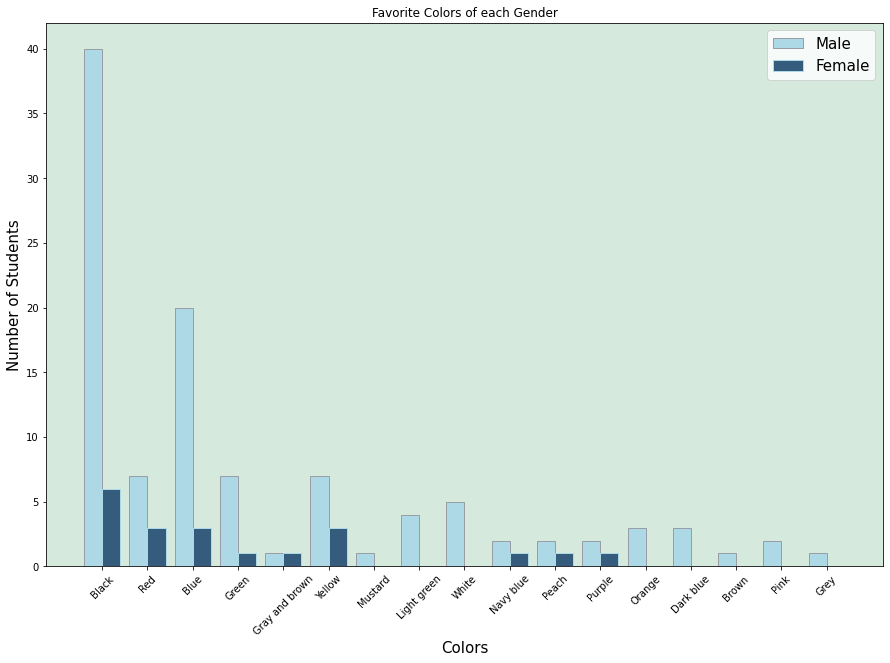

In [309]:
x = df['FavoriteColor'].unique()
jsonObj = {"Color":x}
df2 = pd.DataFrame(x) 
df2 = pd.DataFrame(jsonObj)
df2

male = []
female = []
for color in df2['Color']:
    male_frequency = 0
    female_frequency = 0
    for clr, gndr in zip(df['FavoriteColor'], df['Gender']):
        if color == clr:
            if(gndr == "Male"):
                male_frequency+=1
            else:
                female_frequency+=1
    male.append(male_frequency)
    female.append(female_frequency)
    
X_axis = np.arange(len(x))

plt.figure(figsize=(15, 10))
ax = plt.axes()
ax.set_facecolor("#d5e9dd")
plt.bar(X_axis - 0.2, male, 0.4, label = 'Male', color = 'lightblue',edgecolor='#989da6')
plt.bar(X_axis + 0.2, female, 0.4, label = 'Female', color = '#355C7D',edgecolor='lightblue')
plt.xticks(X_axis, x, rotation=45, fontsize = 10)
plt.xlabel("Colors",  fontsize=15)
plt.ylabel("Number of Students",  fontsize=15)
plt.title("Favorite Colors of each Gender")
plt.legend(fontsize=15)
plt.show()

### Plot line chart of students and their birth months.

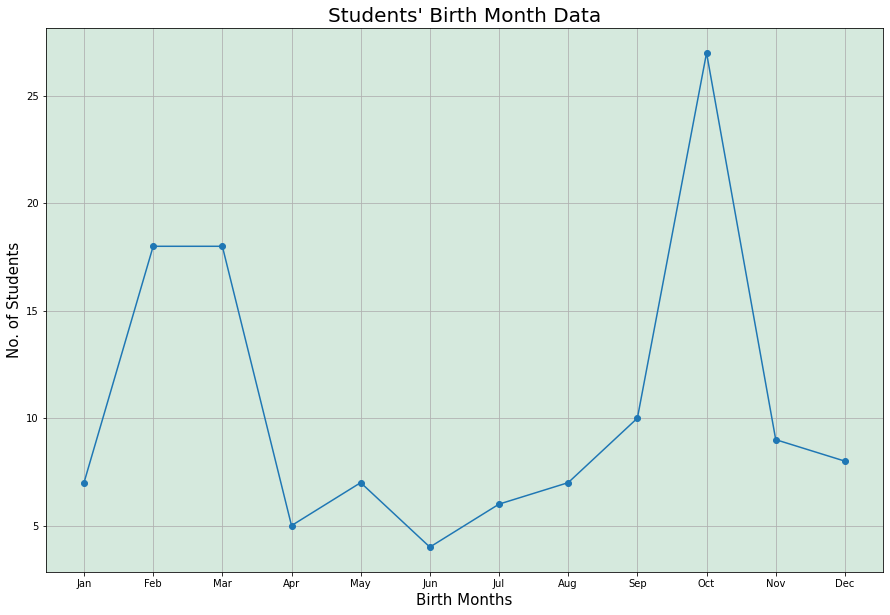

In [308]:
# results_dic =	{
#     "January": 0,
#     "Feburary": 0,
#     "March": 0,
#     "April": 0,
#     "May": 0, 
#     "June": 0,
#     "July": 0, 
#     "August": 0,
#     "September": 0,
#     "October": 0,
#     "November": 0,
#     "December": 0,
# }

results = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


for month in df['BirthMonth']:
    if month == 'January':
        results[0] += 1
    elif month == 'February':
        results[1] += 1
    elif month == 'March':
        results[2] += 1
    elif month == 'April':
        results[3] += 1
    elif month == 'May':
        results[4] += 1
    elif month == 'June':
        results[5] += 1
    elif month == 'July':
        results[6] += 1
    elif month == 'August':
        results[7] += 1
    elif month == 'September':
        results[8] += 1
    elif month == 'October':
        results[9] += 1
    elif month == 'November':
        results[10] += 1
    elif month == 'December':
        results[11] += 1
    
# print(results)
# print(df['BirthMonth'].unique())
plt.figure(figsize=(15, 10))
ax = plt.axes()
ax.set_facecolor("#d5e9dd")
x = np.arange(start=1, stop=13, step = 1)
my_xticks = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(x, my_xticks)
plt.plot(x, results, marker='o')
plt.title("Students' Birth Month Data", fontsize = 20)
plt.xlabel("Birth Months", fontsize = 15)
plt.ylabel("No. of Students", fontsize = 15)
plt.grid(True)
plt.show()

## Create a correlation matrix between HSSC-1 and HSSC-2 marks and then plot on a heatmap.

Dataframe is : 
Correlation matrix is : 
          HSSC-1    HSSC-2
HSSC-1  1.000000 -0.157301
HSSC-2 -0.157301  1.000000


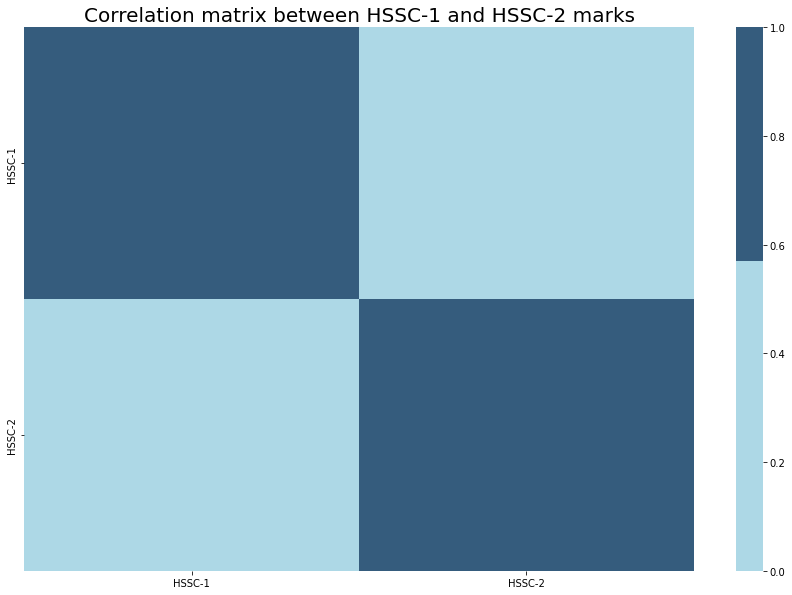

In [307]:
data = {
    'HSSC-1': np.array(df['HSSC-1']),
    'HSSC-2':  np.array(df['HSSC-2'])
}

dataframe = pd.DataFrame(data, columns=['HSSC-1', 'HSSC-2'])
print("Dataframe is : ")
# print(dataframe)

matrix = dataframe.corr()
print("Correlation matrix is : ")
print(matrix)

# plt.figure(figsize=(15, 10))
# ax = plt.axes()
# ax.set_facecolor("#d5e9dd")
# plt.imshow(matrix, cmap='YlGnBu', interpolation='nearest')
# plt.show()

plt.figure(figsize=(15, 10))
plt.title('Correlation matrix between HSSC-1 and HSSC-2 marks', fontsize = 20)
sn.heatmap(matrix, vmin=0, vmax=1, center=0.57, cmap = ['lightblue', '#355C7D'])
plt.show()

## Bonus points: What other things (insights) you can get from the dataset?
### 1. CGPA of Male vs Female students

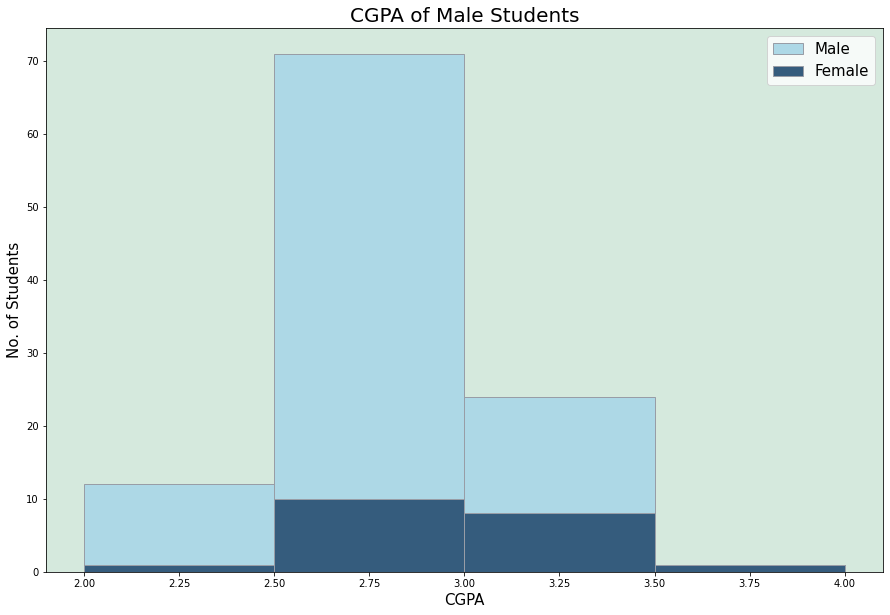

In [306]:
male_results = []
female_results = []

for gpa, gender in zip(df['CGPA'], df['Gender']):
    if gender == 'Male':
        male_results.append(gpa)
    else:
        female_results.append(gpa)

plt.figure(figsize=(15, 10))
ax = plt.axes()
ax.set_facecolor("#d5e9dd")
plt.hist(male_results, color = 'lightblue',edgecolor='#989da6', bins=[2, 2.5, 3.0, 3.5, 4])
plt.hist(female_results, color = '#355C7D',edgecolor='#989da6', bins=[2, 2.5, 3.0, 3.5, 4])
# plt.grid()
plt.title('CGPA of Male Students', fontsize=20)
plt.xlabel('CGPA', fontsize=15)
plt.ylabel('No. of Students', fontsize=15)
plt.legend(["Male" , "Female"], fontsize=15)
plt.show()

### 2. Weights of Male vs Female Students

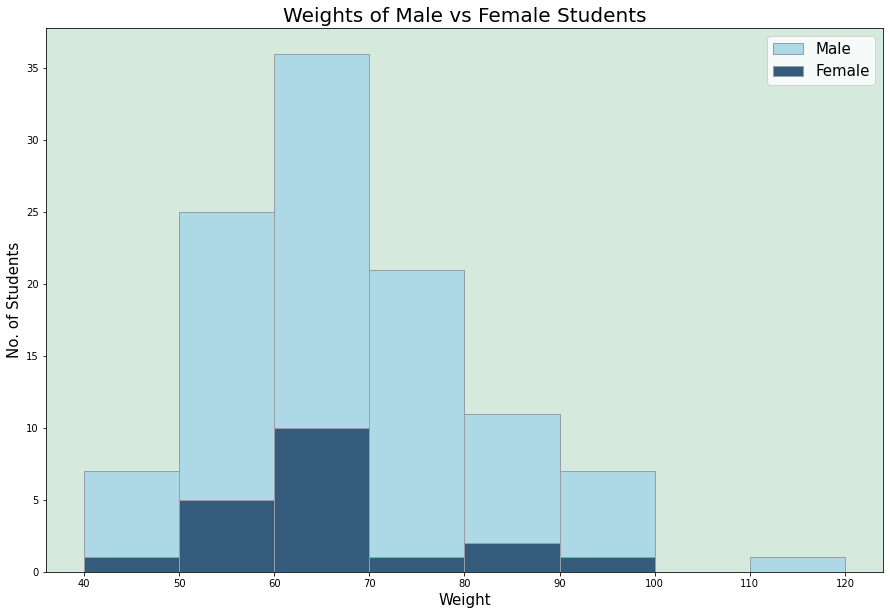

In [ ]:
male_weights = []
female_weights = []

for weight, gender in zip(df['Weight'], df['Gender']):
    if gender == 'Male':
        male_weights.append(weight)
    else:
        female_weights.append(weight)
        
min_male =min(male_weights)
max_male = max(male_weights)

min_female = min(female_weights)
max_female = max(female_weights)

# print(min_male)
# print(max_male)
# print(min_female)
# print(max_female)

# print(male_weights)
# print(female_weights)

plt.figure(figsize=(15, 10))
ax = plt.axes()
ax.set_facecolor("#d5e9dd")
plt.hist(male_weights, color = 'lightblue',edgecolor='#989da6', bins=[40, 50, 60, 70, 80, 90, 100, 110, 120])
plt.hist(female_weights, color = '#355C7D',edgecolor='#989da6', bins=[40, 50, 60, 70, 80, 90, 100, 110, 120])
# plt.grid()
plt.title('Weights of Male vs Female Students', fontsize=20)
plt.xlabel('Weight', fontsize=15)
plt.ylabel('No. of Students', fontsize=15)
plt.legend(["Male" , "Female"], fontsize=15)
plt.show()


### 3. Correlation between HSSC-1 and HSSC-2 total marks and CGPA of students

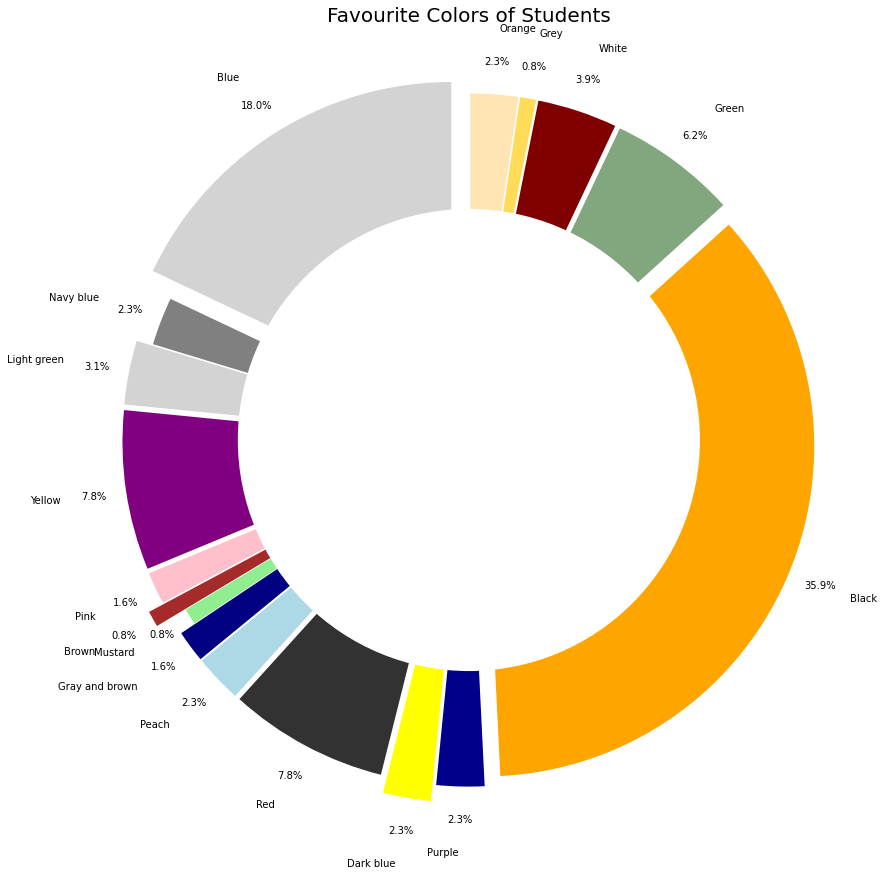

In [16]:
male_colors = []
female_colors = []

for color, gender in zip(df['FavoriteColor'], df['Gender']):
    if gender == 'Male':
        male_colors.append(color)
    else:
        female_colors.append(color)
        
# print(male_colors)
# print(female_colors)

myset = set(df['FavoriteColor'])
# print(myset)
color_list = list(myset)
# print(color_list)
# print(male_colors)
# print(female_colors)

male_frequency = [0] * len(color_list)
female_frequency = [0] * len(color_list)

j = 0
for color in color_list:
    i = 0
    for c in male_colors:
        if color == c:
            male_frequency[j] +=1
    j+=1
    i+=1
    
j = 0
for color in color_list:
    i = 0
    for c in female_colors:
        if color == c:
            female_frequency[j] +=1
    j+=1
    i+=1

total_color_frequency = [0] * len(color_list)

for i in range(len(total_color_frequency)):
    total_color_frequency[i] = male_frequency[i] + female_frequency[i]
    
# print(male_frequency)
# print(female_frequency)
# print(total_color_frequency)


labels = color_list
sizes = total_color_frequency
labels_gender = [''] * 2 * len(color_list)

for i in range(len(labels_gender)):
    if (i % 2) == 0:
        labels_gender[i] = 'Male'
    else:
        labels_gender[i] = 'Female'
       

labels = color_list
sizes = total_color_frequency
colors = ['#D3D3D3', 'Gray', '#D3D3D3', 'Purple', 'Pink','brown', 'lightgreen', '#000080', 'lightblue', '#323232', 'yellow', 'darkblue', 'orange', '#82A67D', '#800000', '#FFDB58', '#FFE5B4']
explode = (0.1,0,0.05,0.05, 0.05,0.1,0,0.05, 0.05,0.05,0.1,0.05, 0.05,0.05,0.05,0.05, 0.05)
 
plt.figure(figsize=(15, 12))
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=1.1, labeldistance=1.2, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# ax1.axis('equal')  
plt.tight_layout()
plt.title("Favourite Colors of Students", fontsize = 20)
plt.show()